In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [2]:
np.random.seed(0)

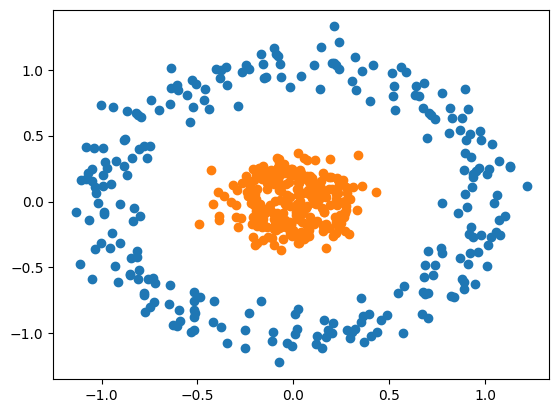

In [3]:
n_pts = 500
# outer circle has label of 0, inner circle is 1
# factor is ratio of inner circle diameter to outer
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise= 0.1, factor=0.2)
# print(X)
# print(y)
plt.scatter(X[y==0, 0], X[y==0, 1]) # outer cir pts
plt.scatter(X[y==1, 0], X[y==1, 1]) # inner circle

In [4]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid')) # input shape of 2 for (x,y)
model.add(Dense(1, activation='sigmoid')) # input not required here because already defined in the previous line (i.e.layer)
model.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
h = model.fit(x=X, y=y, verbose=1, batch_size=5, epochs=100, shuffle='true')

Epoch 1/100
100/100 [==============================] - 2s 6ms/step - loss: 0.7018 - accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 3/100
100/100 [==============================] - 1s 6ms/step - loss: 0.6952 - accuracy: 0.4320
Epoch 4/100
100/100 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.3780
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.3300
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.3300
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4020
Epoch 8/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.4320
Epoch 9/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.3880
Epoch 10/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6927 - accura

Text(0.5, 1.0, 'accuracy')

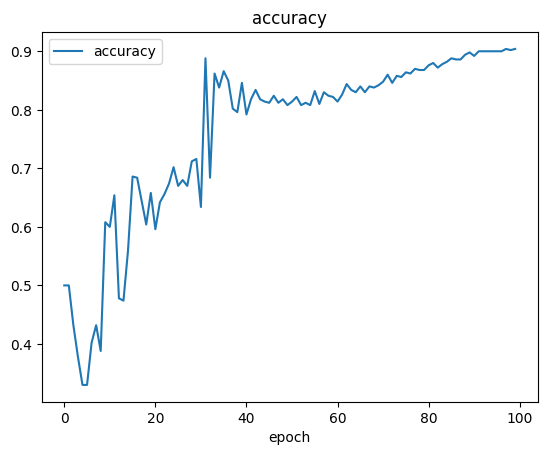

In [6]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

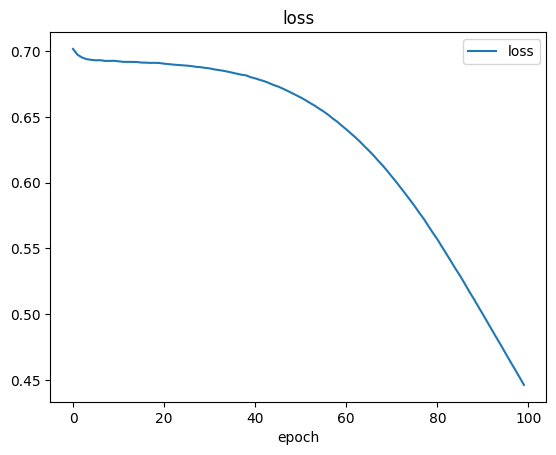

In [7]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [8]:
def plot_decision_boundary(X, y, model): # X is above input data, y is labels(0,1), model is trained fitted model
  x_span = np.linspace(min(X[:,0]) - .25, max(X[:, 0]) + .25, 50) # min and max horizontal values + spacing value (1) to make plot more aesthetic
  y_span = np.linspace(min(X[:,1]) - .25, max(X[:, 1]) + .25, 50)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid) # pred func is just 2500 x 1 (i.e. all points in single row)
  z = pred_func.reshape(xx.shape) # so we reshape 2500 to 50x50 to match grid
  plt.contourf(xx, yy, z)

79/79 [==============================] - 0s 1ms/step


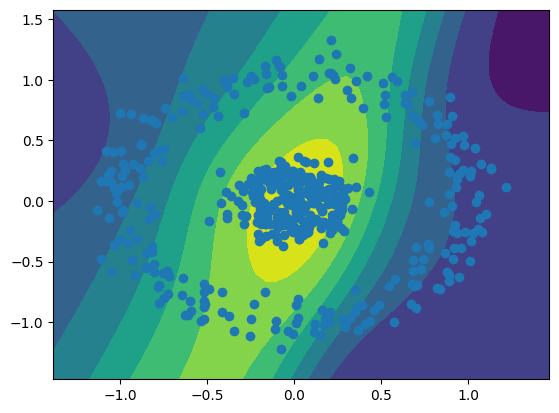

In [9]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

1/1 [==============================] - 0s 18ms/step
Prediction is:  [[0.6910024]]


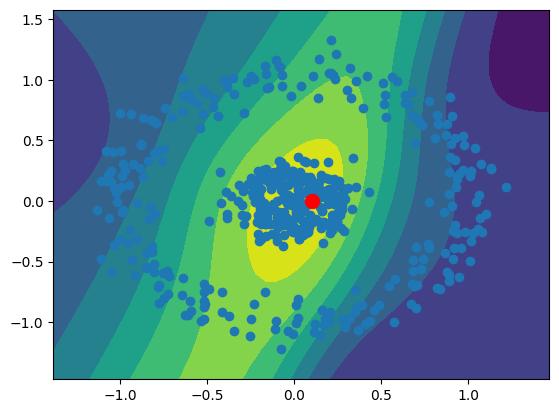

In [10]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0.1
y = 0
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print("Prediction is: ", prediction)